# Домашнее задание

Будем прогнозировать количество проданного товара в городе Бангалор (Индия)

## Импорт библиотек и загрузка данных

In [69]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt


%matplotlib inline

pd.options.display.float_format = "{:.2f}".format

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (15, 8)

# данные по продажам в Индии в различных городах и штатах
df = pd.read_csv("https://raw.githubusercontent.com/aiedu-courses/stepik_applied_tasks/main/datasets/market_arrivals_ind.csv")

In [70]:
df.date = pd.DatetimeIndex(df.date)

# Отсортируем и добавим date в индекс
df = df.sort_values(by="date")
df.index = pd.PeriodIndex(df.date, freq="M")

In [71]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
1996-01,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON,1996-01-01
1996-02,LASALGAON(MS),February,1996,196164,133,229,186,MS,LASALGAON,1996-02-01
1996-03,LASALGAON(MS),March,1996,178992,155,274,243,MS,LASALGAON,1996-03-01
1996-04,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON,1996-04-01
1996-05,LASALGAON(MS),May,1996,237574,154,312,269,MS,LASALGAON,1996-05-01


Оставим только данные по городу Бангалор

In [72]:
dfBang = df.loc[df.city == "BANGALORE"].copy()

In [73]:
# Удалим лишние столбцы
ts = dfBang.drop(
    ["market", "month", "year", "state", "city", "priceMin", "priceMax", "priceMod", "date"], axis=1
)

In [74]:
ts.head()

,quantity
date,
2004-01,227832
2004-02,225133
2004-03,221952
2004-04,185150
2004-05,137390


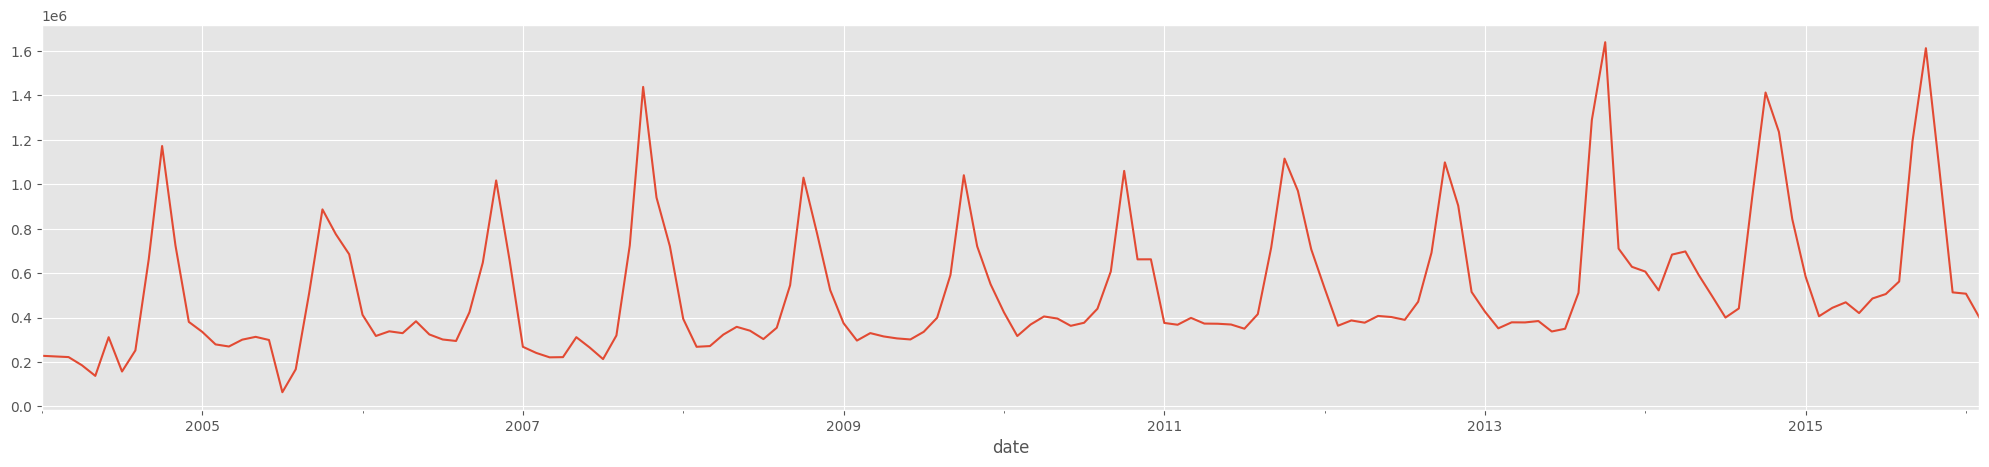

In [75]:
ts.quantity.plot(figsize=(25,5));

## Обучение адаптивных моделей

Разбейте данные (quantity) на train и test.

* train - первые 85% данных

* test - следующие 15% данных

Проверьте, что в тест попало 22 измерения.

In [76]:
# ваш код здесь
train = ts.iloc[:int(0.85 * len(ts))]
test = ts.iloc[int(0.85 * len(ts)):]

print(len(test))

22


Обучите следующие модели на тренировочных данных и сделайте прогноз на 22 шага вперед (величина тестовых данных), нарисуйте прогнозы:

1) Простое экспоненциальное сглаживание с автоматически подбираемым $\alpha$

2) Модель Хольта (аддитивную) с автоматическим подбором гиперпараметров

3) Аддитивную модель Хольта с автоматическим подбором гиперпараметров и затухающим трендом

In [77]:
train.index = train.index.to_series().astype(str)
test.index = test.index.to_series().astype(str)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmode

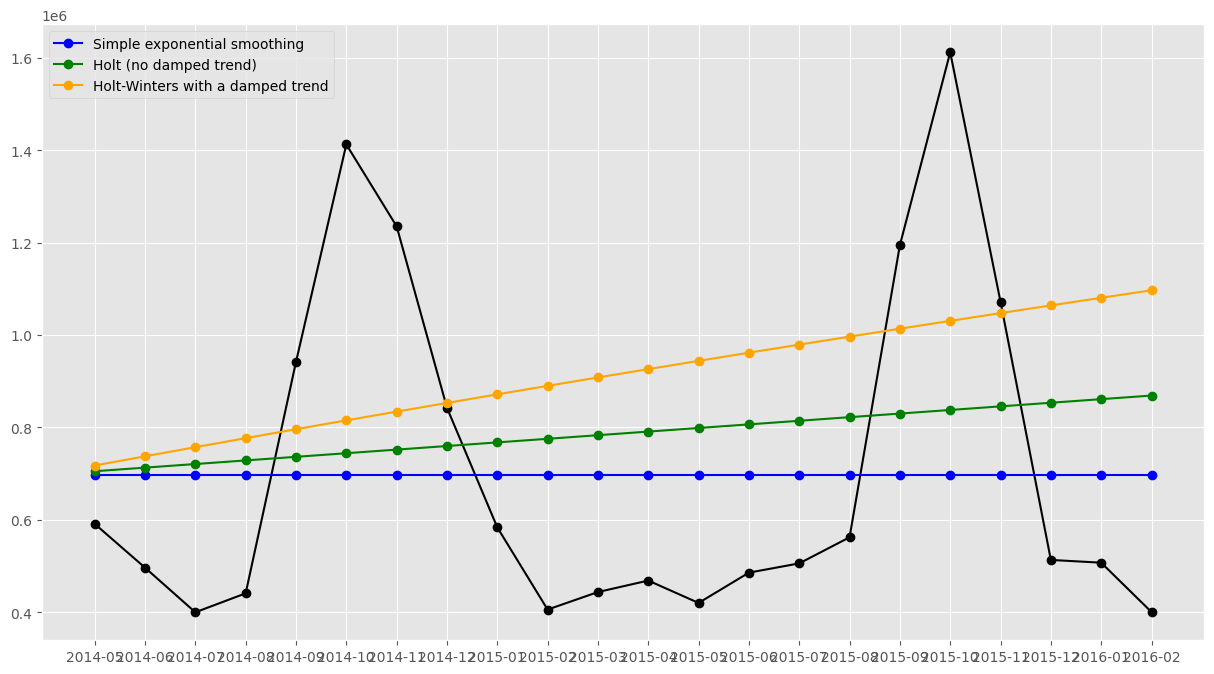

In [79]:
# ваш код здесь
fit1 = SimpleExpSmoothing(train, initialization_method='estimated').fit()
forecast1 = fit1.forecast(22).rename("Simple exponential smoothing")
forecast1.index = forecast1.index.to_series().astype(str).str[:-3]

fit2 = Holt(train, initialization_method='estimated').fit()
forecast2 = fit2.forecast(22).rename("Holt (no damped trend)")
forecast2.index = forecast2.index.to_series().astype(str).str[:-3]

fit3 = Holt(train, damped_trend=True, initialization_method='estimated').fit()
forecast3 = fit3.forecast(22).rename("Holt-Winters with a damped trend")
forecast3.index = forecast3.index.to_series().astype(str).str[:-3]

plt.figure()
plt.plot(test, marker='o', color='black')
(line1,) = plt.plot(forecast1, marker = 'o', color = 'blue')
(line2,) = plt.plot(forecast2, marker = 'o', color = 'green')
(line3,) = plt.plot(forecast3, marker = 'o', color = 'orange')
plt.legend([line1, line2, line3], [forecast1.name, forecast2.name, forecast3.name])

## Quiz

У какой из трех обученных моделей самый быстро возрастающий тренд?

Обучите четыре модели Хольта-Винтерса на тренировочных данных и сделайте прогноз на 22 шага вперед (величина тестовых данных), нарисуйте прогнозы:

1) Модель с аддитивными трендом и сезонностью

2) Модель с аддитивным трендом и мультипликативной сезонностью

3) Модель с аддитивными трендом и сезонностью и затухающим трендом

4) Модель с аддитивным трендом и мультипликативной сезонностью и затухающим трендом

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


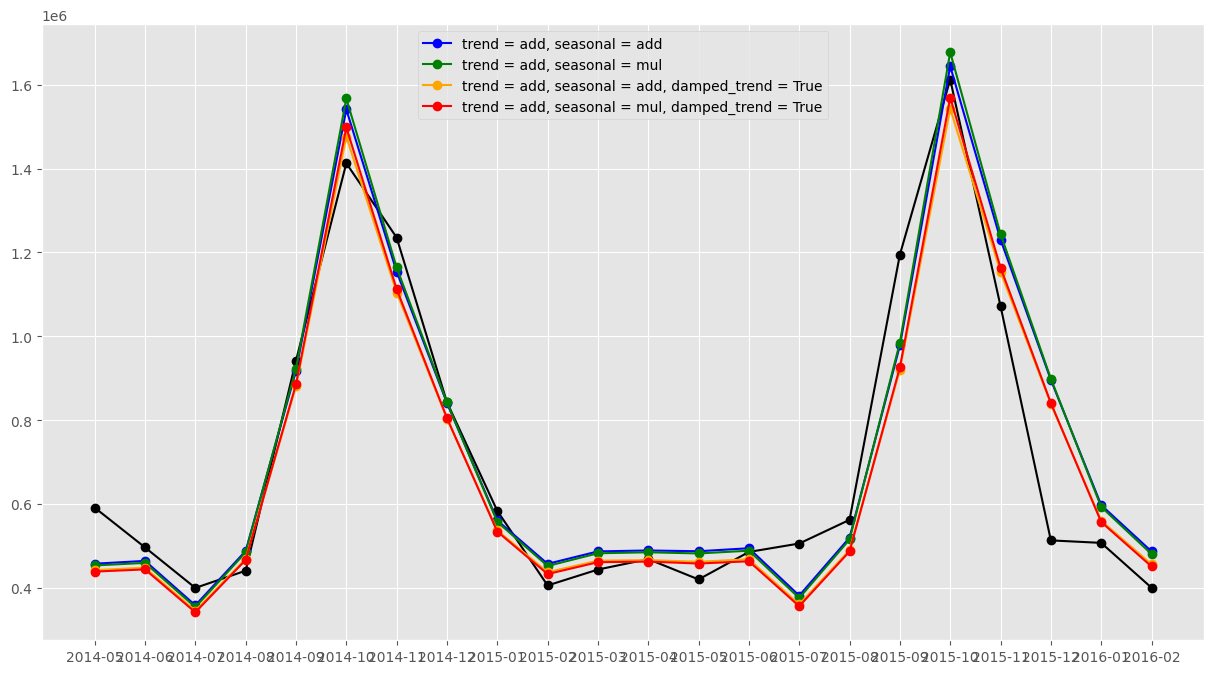

In [87]:
# ваш код здесь
fit1 = ExponentialSmoothing(train, seasonal_periods = 12, trend = 'add', seasonal = 'add', use_boxcox=True, initialization_method="estimated").fit()
forecast1 = fit1.forecast(22).rename("trend = add, seasonal = add")
forecast1.index = forecast1.index.to_series().astype(str).str[:-3]

fit2 = ExponentialSmoothing(train, seasonal_periods = 12, trend = 'add', seasonal = 'mul', use_boxcox=True, initialization_method="estimated").fit()
forecast2 = fit2.forecast(22).rename("trend = add, seasonal = mul")
forecast2.index = forecast2.index.to_series().astype(str).str[:-3]

fit3 = ExponentialSmoothing(train, seasonal_periods = 12, trend = 'add', seasonal = 'add', damped_trend = True, use_boxcox=True, initialization_method="estimated").fit()
forecast3 = fit3.forecast(22).rename("trend = add, seasonal = add, damped_trend = True")
forecast3.index = forecast3.index.to_series().astype(str).str[:-3]

fit4 = ExponentialSmoothing(train, seasonal_periods = 12, trend = 'add', seasonal = 'mul', damped_trend = True, use_boxcox=True, initialization_method="estimated").fit()
forecast4 = fit4.forecast(22).rename("trend = add, seasonal = mul, damped_trend = True")
forecast4.index = forecast4.index.to_series().astype(str).str[:-3]

plt.figure()
plt.plot(test, marker='o', color='black')
(line1,) = plt.plot(forecast1, marker = 'o', color = 'blue')
(line2,) = plt.plot(forecast2, marker = 'o', color = 'green')
(line3,) = plt.plot(forecast3, marker = 'o', color = 'orange')
(line4,) = plt.plot(forecast4, marker = 'o', color = 'red')
plt.legend([line1, line2, line3, line4], [forecast1.name, forecast2.name, forecast3.name, forecast4.name])

Вычислите RMSE (корень из среднеквадратичной ошибки) на тестовых данных для каждого из четырех прогнозов.

In [88]:
from sklearn.metrics import mean_squared_error

# ваш код здесь
rmse1 = mean_squared_error(test, forecast1, squared=False)
print(rmse1)
rmse2 = mean_squared_error(test, forecast2, squared=False)
print(rmse2)
rmse3 = mean_squared_error(test, forecast3, squared=False)
print(rmse3)
rmse4 = mean_squared_error(test, forecast4, squared=False)
print(rmse4)

118556.94951461535
120856.41355606912
113917.84823567093
113898.35410132994


## Quiz

Какая модель справилась лучше остальных?

Модель Хольта-Винтерса с аддитивным трендом и мультипликативной сезонностью и затухающим трендом; RMSE = 113898.35

## Quiz

Чему равно значение RMSE для лучшей модели? Ответ округлите до целого числа.

Ответ: 113898

В предыдущем домашнем задании мы работали с логарифмированным рядом и вычисляли RMSE для него.

Вычислите ошибки последних четырех моделей для логарифмов правильных ответов и прогнозов.

In [92]:
# ваш код здесь
import numpy as np
ts['quantity'] = np.log(ts['quantity'])

fit1 = ExponentialSmoothing(train, seasonal_periods = 12, trend = 'add', seasonal = 'add', use_boxcox=True, initialization_method="estimated").fit()
forecast1 = fit1.forecast(22).rename("trend = add, seasonal = add")
forecast1.index = forecast1.index.to_series().astype(str).str[:-3]

fit2 = ExponentialSmoothing(train, seasonal_periods = 12, trend = 'add', seasonal = 'mul', use_boxcox=True, initialization_method="estimated").fit()
forecast2 = fit2.forecast(22).rename("trend = add, seasonal = mul")
forecast2.index = forecast2.index.to_series().astype(str).str[:-3]

fit3 = ExponentialSmoothing(train, seasonal_periods = 12, trend = 'add', seasonal = 'add', damped_trend = True, use_boxcox=True, initialization_method="estimated").fit()
forecast3 = fit3.forecast(22).rename("trend = add, seasonal = add, damped_trend = True")
forecast3.index = forecast3.index.to_series().astype(str).str[:-3]

fit4 = ExponentialSmoothing(train, seasonal_periods = 12, trend = 'add', seasonal = 'mul', damped_trend = True, use_boxcox=True, initialization_method="estimated").fit()
forecast4 = fit4.forecast(22).rename("trend = add, seasonal = mul, damped_trend = True")
forecast4.index = forecast4.index.to_series().astype(str).str[:-3]

rmse1 = mean_squared_error(test, forecast1, squared=False)
print(rmse1)
rmse2 = mean_squared_error(test, forecast2, squared=False)
print(rmse2)
rmse3 = mean_squared_error(test, forecast3, squared=False)
print(rmse3)
rmse4 = mean_squared_error(test, forecast4, squared=False)
print(rmse4)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


0.17476754663454275
0.1759497127846287
0.17087389284613883
0.17256792199006799


В этот раз наименьшей ошибки RMSE (=0.171) добилась модель Хольта-Винтерса с аддитивными трендом и сезонностью и затухающим трендом

## Quiz

Какое семейство моделей лучше справилось с решением задачи:
SARIMAX или модели Хольта-Винтерса?

Модели Хольта-Винтерса показали более хороший результат